# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
#Import your libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np



# Challenge 1 - Import and Describe the Dataset

#### In this challenge we will use the `austin_weather` data. 

#### First, import it into a data frame called `austin`. You can find the data in Ironhack's database (db: weather, table: austin_weather). 

In [2]:
# Your code here
austin = pd.read_csv('../../../../datasets/austin_weather.csv')

#### Next, describe the dataset you have loaded: 
- Look at the variables and their types
- Examine the descriptive statistics of the numeric variables 
- Look at the first five rows of all variables to evaluate the categorical variables as well

In [3]:
# Your code here
austin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [4]:
# Your code here
austin.describe()

,TempHighF,TempAvgF,TempLowF
count,1319.000000,1319.000000,1319.000000
mean,80.862775,70.642911,59.902957
std,14.766523,14.045904,14.190648
min,32.000000,29.000000,19.000000
25%,72.000000,62.000000,49.000000
50%,83.000000,73.000000,63.000000
75%,92.000000,83.000000,73.000000
max,107.000000,93.000000,81.000000


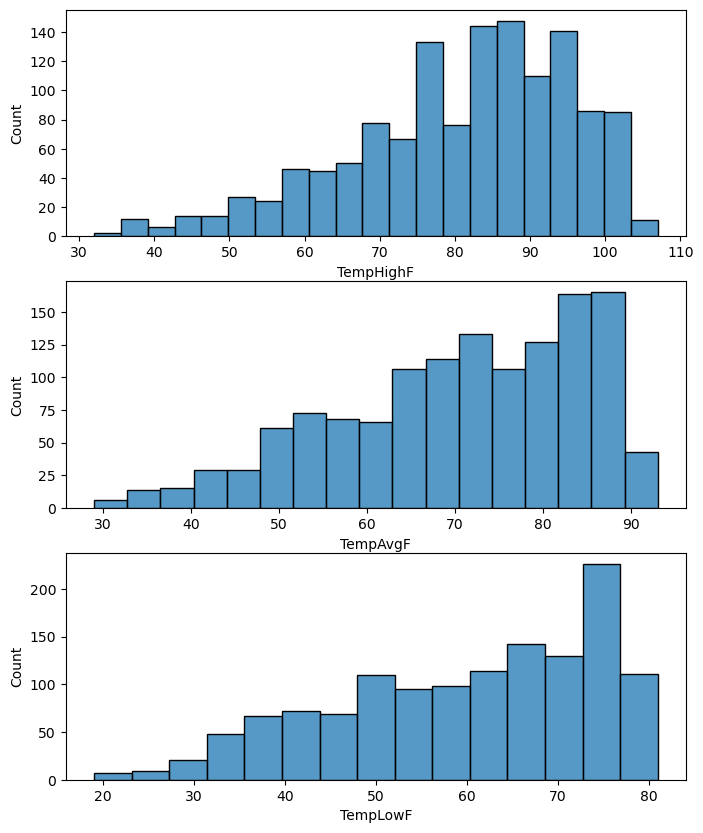

In [5]:
fig, axs = plt.subplots(ncols=1,
                        nrows=3,
                        figsize=(8,10))

plt.sca(axs[0])
sns.histplot(data=austin,
             x='TempHighF')

plt.sca(axs[1])
sns.histplot(data=austin,
             x='TempAvgF')

plt.sca(axs[2])
sns.histplot(data=austin,
             x='TempLowF')

plt.show()

In [6]:
# Your code here
pd.options.display.max_columns = None
austin.head(5)

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,


In [7]:
austin['Events'].unique()

array(['Rain , Thunderstorm', ' ', 'Rain', 'Fog', 'Rain , Snow',
       'Fog , Rain', 'Thunderstorm', 'Fog , Rain , Thunderstorm',
       'Fog , Thunderstorm'], dtype=object)

#### Given the information you have learned from examining the dataset, write down three insights about the data in a markdown cell below

#### Your Insights:

1. There are 21 variables in the dataset. 3 of them are numeric and the rest contain some text.

2. The average temperature in Austin ranged between around 70 degrees F and around 93 degrees F. The highest temperature observed during this period was 107 degrees F and the lowest was 19 degrees F.

3. When we look at the head function, we see that a lot of variables contain numeric data even though these columns are of object type. This means we might have to do some data cleansing.


#### My insights:
- There are 1319 records, no null values.
- They are 21 features, watching type data and value of first 5 rows:
    - 3 columns are numerical and the others (18) are objects.
    - 1 column is a date.
    - 1 column is categorical.
    - The others columns (16) could be a number, but you can see in first rows a string value for example in PrecipitationSumInches. It's necessary clean data and then convert types.
- Temperature is in degrees Fahrenheit.
- Mean of average temp is 71, min average temp is 29 and max is 93.
- Max temp is 107 degrees F and min temp is 19 degrees F.
- Plot temperatures max, avg and min, you can see is left skewed distribution.


#### Let's examine the DewPointAvgF variable by using the `unique()` function to list all unique values in this dataframe.

Describe what you find in a markdown cell below the code. What did you notice? What do you think made Pandas to treat this column as *object* instead of *int64*? 

In [8]:
# Your code here
austin['DewPointAvgF'].unique()

array(['49', '36', '27', '28', '40', '39', '41', '26', '42', '22', '48',
       '32', '8', '11', '45', '55', '61', '37', '47', '25', '23', '20',
       '33', '30', '29', '17', '14', '13', '54', '59', '15', '24', '34',
       '35', '57', '50', '53', '60', '46', '56', '51', '31', '38', '62',
       '43', '63', '64', '67', '66', '58', '70', '68', '65', '69', '71',
       '72', '-', '73', '74', '21', '44', '52', '12', '75', '76', '18'],
      dtype=object)

#### Your observation here

A value is -, for this reason pandas set column to object (no int). You should replace/drop these rows and then convert to int data type.


The following is a list of columns misrepresented as `object`. Use this list to convert the columns to numeric using the `pandas.to_numeric` function in the next cell. If you encounter errors in converting strings to numeric values, you need to catch those errors and force the conversion by supplying `errors='coerce'` as an argument for `pandas.to_numeric`. Coercing will replace non-convertable elements with `NaN` which represents an undefined numeric value. This makes it possible for us to conveniently handle missing values in subsequent data processing.

*Hint: you may use a loop to change one column at a time but it is more efficient to use `apply`.*

In [9]:
wrong_type_columns = ['DewPointHighF', 'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent', 
                      'HumidityAvgPercent', 'HumidityLowPercent', 'SeaLevelPressureHighInches', 
                      'SeaLevelPressureAvgInches' ,'SeaLevelPressureLowInches', 'VisibilityHighMiles',
                      'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH', 
                      'WindGustMPH', 'PrecipitationSumInches']
print(len(wrong_type_columns))

16


In [10]:
austin.isnull().sum()

Date                          0
TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent            0
HumidityLowPercent            0
SeaLevelPressureHighInches    0
SeaLevelPressureAvgInches     0
SeaLevelPressureLowInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH                   0
WindAvgMPH                    0
WindGustMPH                   0
PrecipitationSumInches        0
Events                        0
dtype: int64

In [11]:
# Your code here
austin[wrong_type_columns] = austin[wrong_type_columns].apply(pd.to_numeric, errors='coerce')

In [12]:
austin.isnull().sum()

Date                            0
TempHighF                       0
TempAvgF                        0
TempLowF                        0
DewPointHighF                   7
DewPointAvgF                    7
DewPointLowF                    7
HumidityHighPercent             2
HumidityAvgPercent              2
HumidityLowPercent              2
SeaLevelPressureHighInches      3
SeaLevelPressureAvgInches       3
SeaLevelPressureLowInches       3
VisibilityHighMiles            12
VisibilityAvgMiles             12
VisibilityLowMiles             12
WindHighMPH                     2
WindAvgMPH                      2
WindGustMPH                     4
PrecipitationSumInches        124
Events                          0
dtype: int64

#### Check if your code has worked by printing the data types again. You should see only two `object` columns (`Date` and `Events`) now. All other columns should be `int64` or `float64`.

In [13]:
# Your code here
austin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1319 non-null   object 
 1   TempHighF                   1319 non-null   int64  
 2   TempAvgF                    1319 non-null   int64  
 3   TempLowF                    1319 non-null   int64  
 4   DewPointHighF               1312 non-null   float64
 5   DewPointAvgF                1312 non-null   float64
 6   DewPointLowF                1312 non-null   float64
 7   HumidityHighPercent         1317 non-null   float64
 8   HumidityAvgPercent          1317 non-null   float64
 9   HumidityLowPercent          1317 non-null   float64
 10  SeaLevelPressureHighInches  1316 non-null   float64
 11  SeaLevelPressureAvgInches   1316 non-null   float64
 12  SeaLevelPressureLowInches   1316 non-null   float64
 13  VisibilityHighMiles         1307 

# Challenge 2 - Handle the Missing Data

#### Now that we have fixed the type mismatch, let's address the missing data.

By coercing the columns to numeric, we have created `NaN` for each cell containing characters. We should choose a strategy to address these missing data.

The first step is to examine how many rows contain missing data.

We check how much missing data we have by applying the `.isnull()` function to our dataset. To find the rows with missing data in any of its cells, we apply `.any(axis=1)` to the function. `austin.isnull().any(axis=1)` will return a column containing true if the row contains at least one missing value and false otherwise. Therefore we must subset our dataframe with this column. This will give us all rows with at least one missing value. 

#### In the next cell, identify all rows containing at least one missing value. Assign the dataframes with missing values to a variable called `missing_values`.

In [14]:
# Your code here
missing_values = austin.loc[austin.isnull().any(axis=1)]
missing_values

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,NaN,
6,2013-12-27,60,53,45,41.0,39.0,37.0,83.0,65.0,47.0,30.46,30.39,30.34,10.0,9.0,7.0,7.0,1.0,11.0,NaN,
7,2013-12-28,62,51,40,43.0,39.0,33.0,92.0,64.0,36.0,30.33,30.17,30.04,10.0,10.0,7.0,10.0,2.0,14.0,NaN,
42,2014-02-01,76,66,55,62.0,59.0,41.0,81.0,71.0,60.0,29.91,29.81,29.75,10.0,10.0,9.0,14.0,6.0,26.0,NaN,Rain
51,2014-02-10,60,48,35,49.0,36.0,30.0,82.0,74.0,66.0,30.23,30.15,30.02,10.0,8.0,4.0,15.0,9.0,23.0,NaN,Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,2017-06-12,94,85,75,72.0,68.0,62.0,87.0,62.0,36.0,29.96,29.89,29.81,10.0,10.0,2.0,15.0,7.0,22.0,NaN,Rain
1288,2017-07-01,98,89,79,76.0,72.0,66.0,85.0,62.0,38.0,30.13,30.02,29.92,10.0,9.0,6.0,15.0,7.0,24.0,NaN,
1304,2017-07-17,98,88,77,75.0,71.0,66.0,88.0,63.0,38.0,29.94,29.90,29.84,10.0,10.0,10.0,16.0,3.0,23.0,NaN,"Rain , Thunderstorm"
1308,2017-07-21,104,91,77,74.0,68.0,61.0,85.0,56.0,27.0,30.01,29.95,29.86,10.0,10.0,10.0,14.0,5.0,24.0,NaN,


There are multiple strategies to handle missing data. Below lists the most common ones data scientists use:

* Removing all rows or all columns containing missing data. This is the simplest strategy. It may work in some cases but not others.

* Filling all missing values with a placeholder value. 
    * For categorical data, `0`, `-1`, and `9999` are some commonly used placeholder values. 
    * For continuous data, some may opt to fill all missing data with the mean. This strategy is not optimal since it can increase the fit of the model.

* Filling the values using some algorithm. 

#### In our case, we will use a hybrid approach which is to first remove the data that contain most missing values then fill in the rest of the missing values with the *linear interpolation* algorithm.

#### Next, count the number of rows of `austin` and `missing_values`.

In [15]:
# Your code here
print(f'number of rows austin: {len(austin)}, number of rows missing_values: {len(missing_values)}')

number of rows austin: 1319, number of rows missing_values: 136


#### Calculate the ratio of missing rows to total rows

In [16]:
# Your code here
print(f'ratio missing rows is: {round((136 / 1319 * 100), 2)}')

ratio missing rows is: 10.31


As you can see, there is a large proportion of missing data (over 10%). Perhaps we should evaluate which columns have the most missing data and remove those columns. For the remaining columns, we will perform a linear approximation of the missing data.

We can find the number of missing rows in each column using the `.isna()` function. We then chain the `.sum` function to the `.isna()` function and find the number of missing rows per column

In [17]:
# Your code here
austin.isna().sum()

Date                            0
TempHighF                       0
TempAvgF                        0
TempLowF                        0
DewPointHighF                   7
DewPointAvgF                    7
DewPointLowF                    7
HumidityHighPercent             2
HumidityAvgPercent              2
HumidityLowPercent              2
SeaLevelPressureHighInches      3
SeaLevelPressureAvgInches       3
SeaLevelPressureLowInches       3
VisibilityHighMiles            12
VisibilityAvgMiles             12
VisibilityLowMiles             12
WindHighMPH                     2
WindAvgMPH                      2
WindGustMPH                     4
PrecipitationSumInches        124
Events                          0
dtype: int64

#### As you can see from the output, the majority of missing data is in one column called `PrecipitationSumInches`. What's the number of missing values in this column in ratio to its total number of rows?

In [18]:
# Your code here
print(f'ratio missing rows PrecipitationSumInches is: {round((124 / 1319 * 100), 2)}')

ratio missing rows PrecipitationSumInches is: 9.4


Over 10% data missing! Therefore, we prefer to remove this column instead of filling its missing values. It doesn't make sense to *guess* its missing values because the estimation will be too 

#### Remove this column from `austin` using the `.drop()` function. Use the `inplace=True` argument.

*Hints:*

* By supplying `inplace=True` to `drop()`, the original dataframe object will be changed in place and the function will return `None`. In contrast, if you don't supply `inplace=True`, which is equivalent to supplying `inplace=False` because `False` is the default value, the original dataframe object will be kept and the function returns a copy of the transformed dataframe object. In the latter case, you'll have to assign the returned object back to your variable.

* Also, since you are dropping a column instead of a row, you'll need to supply `axis=1` to `drop()`.

[Reference for `pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)

In [19]:
# Your code here 
austin.drop(['PrecipitationSumInches'], axis=1, inplace=True)

# Print `austin` to confirm the column is indeed removed

austin

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Events
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,
2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,
3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71.0,67.0,61.0,82.0,54.0,25.0,30.04,29.97,29.88,10.0,10.0,10.0,12.0,5.0,21.0,
1315,2017-07-28,105,91,76,71.0,64.0,55.0,87.0,54.0,20.0,29.97,29.90,29.81,10.0,10.0,10.0,14.0,5.0,20.0,
1316,2017-07-29,107,92,77,72.0,64.0,55.0,82.0,51.0,19.0,29.91,29.86,29.79,10.0,10.0,10.0,12.0,4.0,17.0,
1317,2017-07-30,106,93,79,70.0,68.0,63.0,69.0,48.0,27.0,29.96,29.91,29.87,10.0,10.0,10.0,13.0,4.0,20.0,


#### Next we will perform linear interpolation of the missing data.

This means that we will use a linear algorithm to estimate the missing data. Linear interpolation assumes that there is a straight line between the points and the missing point will fall on that line. This is a good enough approximation for weather related data. Weather related data is typically a time series. Therefore, we do not want to drop rows from our data if possible. It is prefereable to estimate the missing values rather than remove the rows. However, if you have data from a single point in time, perhaps a better solution would be to remove the rows. 

If you would like to read more about linear interpolation, you can do so [here](https://en.wikipedia.org/wiki/Linear_interpolation).

In the following cell, use the `.interpolate()` function on the entire dataframe. This time pass the `inplace=False` argument to the function and assign the interpolated dataframe to a new variable called `austin_fixed` so that we can compare with `austin`.

In [20]:
austin.isna().sum()

Date                           0
TempHighF                      0
TempAvgF                       0
TempLowF                       0
DewPointHighF                  7
DewPointAvgF                   7
DewPointLowF                   7
HumidityHighPercent            2
HumidityAvgPercent             2
HumidityLowPercent             2
SeaLevelPressureHighInches     3
SeaLevelPressureAvgInches      3
SeaLevelPressureLowInches      3
VisibilityHighMiles           12
VisibilityAvgMiles            12
VisibilityLowMiles            12
WindHighMPH                    2
WindAvgMPH                     2
WindGustMPH                    4
Events                         0
dtype: int64

In [21]:
# Your code here
austin_fixed = austin.interpolate()
austin_fixed

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Events
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,
2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,
3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71.0,67.0,61.0,82.0,54.0,25.0,30.04,29.97,29.88,10.0,10.0,10.0,12.0,5.0,21.0,
1315,2017-07-28,105,91,76,71.0,64.0,55.0,87.0,54.0,20.0,29.97,29.90,29.81,10.0,10.0,10.0,14.0,5.0,20.0,
1316,2017-07-29,107,92,77,72.0,64.0,55.0,82.0,51.0,19.0,29.91,29.86,29.79,10.0,10.0,10.0,12.0,4.0,17.0,
1317,2017-07-30,106,93,79,70.0,68.0,63.0,69.0,48.0,27.0,29.96,29.91,29.87,10.0,10.0,10.0,13.0,4.0,20.0,


#### Check to make sure `austin_fixed` contains no missing data. Also check `austin` - it still contains missing data.

In [22]:
# Your code here
austin_fixed.isna().sum()

Date                          0
TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent            0
HumidityLowPercent            0
SeaLevelPressureHighInches    0
SeaLevelPressureAvgInches     0
SeaLevelPressureLowInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH                   0
WindAvgMPH                    0
WindGustMPH                   0
Events                        0
dtype: int64

In [23]:
austin.isna().sum()

Date                           0
TempHighF                      0
TempAvgF                       0
TempLowF                       0
DewPointHighF                  7
DewPointAvgF                   7
DewPointLowF                   7
HumidityHighPercent            2
HumidityAvgPercent             2
HumidityLowPercent             2
SeaLevelPressureHighInches     3
SeaLevelPressureAvgInches      3
SeaLevelPressureLowInches      3
VisibilityHighMiles           12
VisibilityAvgMiles            12
VisibilityLowMiles            12
WindHighMPH                    2
WindAvgMPH                     2
WindGustMPH                    4
Events                         0
dtype: int64

# Challenge 3 - Processing the `Events` Column

#### Our dataframe contains one true text column - the Events column. We should evaluate this column to determine how to process it.

Use the `value_counts()` function to evaluate the contents of this column

In [24]:
# Your code here:
austin['Events'].value_counts()

                             903
Rain                         192
Rain , Thunderstorm          137
Fog , Rain , Thunderstorm     33
Fog                           21
Thunderstorm                  17
Fog , Rain                    14
Rain , Snow                    1
Fog , Thunderstorm             1
Name: Events, dtype: int64

Reading the values of `Events` and reflecting what those values mean in the context of data, you realize this column indicates what weather events had happened in a particular day.

#### What is the largest number of events happened in a single day? Enter your answer in the next cell.

In [25]:
# Your answer:
max([len(i.split(',')) for i in austin['Events'].unique()])


3

#### We want to transform the string-type `Events` values to the numbers. This will allow us to apply machine learning algorithms easily.

How? We will create a new column for each type of events (i.e. *Rain*, *Snow*, *Fog*, *Thunderstorm*. In each column, we use `1` to indicate if the corresponding event happened in that day and use `0` otherwise.

Below we provide you a list of all event types. Loop the list and create a dummy column with `0` values for each event in `austin_fixed`. To create a new dummy column with `0` values, simply use `austin_fixed[event] = 0`.

In [26]:
event_list = ['Snow', 'Fog', 'Rain', 'Thunderstorm']

# Your code here
for event in event_list:
    austin_fixed[event] = 0

# Print your new dataframe to check whether new columns have been created:

austin_fixed

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Events,Snow,Fog,Rain,Thunderstorm
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,"Rain , Thunderstorm",0,0,0,0
1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,,0,0,0,0
2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,,0,0,0,0
3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,,0,0,0,0
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71.0,67.0,61.0,82.0,54.0,25.0,30.04,29.97,29.88,10.0,10.0,10.0,12.0,5.0,21.0,,0,0,0,0
1315,2017-07-28,105,91,76,71.0,64.0,55.0,87.0,54.0,20.0,29.97,29.90,29.81,10.0,10.0,10.0,14.0,5.0,20.0,,0,0,0,0
1316,2017-07-29,107,92,77,72.0,64.0,55.0,82.0,51.0,19.0,29.91,29.86,29.79,10.0,10.0,10.0,12.0,4.0,17.0,,0,0,0,0
1317,2017-07-30,106,93,79,70.0,68.0,63.0,69.0,48.0,27.0,29.96,29.91,29.87,10.0,10.0,10.0,13.0,4.0,20.0,,0,0,0,0


#### Next, populate the actual values in the dummy columns of  `austin_fixed`.

You will check the *Events* column. If its string value contains `Rain`, then the *Rain* column should be `1`. The same for `Snow`, `Fog`, and `Thunderstorm`.

*Hints:*

* Use [`pandas.Series.str.contains()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html) to create the value series of each new column.

* What if the values you populated are booleans instead of numbers? You can cast the boolean values to numbers by using `.astype(int)`. For instance, `pd.Series([True, True, False]).astype(int)` will return a new series with values of `[1, 1, 0]`.

In [27]:
austin_fixed['Snow'] = austin_fixed['Events'].str.contains('Snow').astype(int)
austin_fixed['Fog'] = austin_fixed['Events'].str.contains('Fog').astype(int)
austin_fixed['Rain'] = austin_fixed['Events'].str.contains('Rain').astype(int)
austin_fixed['Thunderstorm'] = austin_fixed['Events'].str.contains('Thunderstorm').astype(int)

#### Print out `austin_fixed` to check if the event columns are populated with the intended values

In [28]:
# Your code here
austin_fixed

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Events,Snow,Fog,Rain,Thunderstorm
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,"Rain , Thunderstorm",0,0,1,1
1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,,0,0,0,0
2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,,0,0,0,0
3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,,0,0,0,0
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71.0,67.0,61.0,82.0,54.0,25.0,30.04,29.97,29.88,10.0,10.0,10.0,12.0,5.0,21.0,,0,0,0,0
1315,2017-07-28,105,91,76,71.0,64.0,55.0,87.0,54.0,20.0,29.97,29.90,29.81,10.0,10.0,10.0,14.0,5.0,20.0,,0,0,0,0
1316,2017-07-29,107,92,77,72.0,64.0,55.0,82.0,51.0,19.0,29.91,29.86,29.79,10.0,10.0,10.0,12.0,4.0,17.0,,0,0,0,0
1317,2017-07-30,106,93,79,70.0,68.0,63.0,69.0,48.0,27.0,29.96,29.91,29.87,10.0,10.0,10.0,13.0,4.0,20.0,,0,0,0,0


In [29]:
austin_fixed.loc[austin_fixed['Events'] != ' ']

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Events,Snow,Fog,Rain,Thunderstorm
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,"Rain , Thunderstorm",0,0,1,1
18,2014-01-08,53,47,40,51.0,45.0,30.0,93.0,75.0,57.0,30.33,30.20,30.12,10.0,2.0,1.0,12.0,1.0,18.0,Rain,0,0,1,0
19,2014-01-09,70,62,53,60.0,55.0,50.0,93.0,80.0,66.0,30.18,30.11,30.00,10.0,4.0,0.0,12.0,3.0,19.0,Fog,0,1,0,0
20,2014-01-10,72,65,57,64.0,61.0,54.0,93.0,81.0,68.0,29.97,29.87,29.75,10.0,8.0,1.0,13.0,6.0,21.0,Rain,0,0,1,0
22,2014-01-12,67,57,46,58.0,47.0,33.0,84.0,68.0,52.0,30.12,30.01,29.90,10.0,10.0,10.0,15.0,4.0,24.0,Rain,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,2017-07-08,100,88,75,71.0,67.0,62.0,87.0,59.0,31.0,30.09,30.02,29.94,10.0,10.0,10.0,9.0,3.0,17.0,Thunderstorm,0,0,0,1
1302,2017-07-15,103,87,71,73.0,70.0,63.0,100.0,65.0,29.0,30.07,30.01,29.94,10.0,9.0,2.0,23.0,3.0,35.0,"Rain , Thunderstorm",0,0,1,1
1304,2017-07-17,98,88,77,75.0,71.0,66.0,88.0,63.0,38.0,29.94,29.90,29.84,10.0,10.0,10.0,16.0,3.0,23.0,"Rain , Thunderstorm",0,0,1,1
1310,2017-07-23,103,90,77,74.0,71.0,66.0,85.0,58.0,31.0,29.93,29.88,29.82,10.0,10.0,2.0,13.0,4.0,24.0,"Rain , Thunderstorm",0,0,1,1


#### If your code worked correctly, now we can drop the `Events` column as we don't need it any more.

In [30]:
# Your code here
austin_fixed.drop(['Events'], axis=1, inplace=True)
austin_fixed

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Snow,Fog,Rain,Thunderstorm
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,0,0,1,1
1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,0,0,0,0
2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,0,0,0,0
3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,0,0,0,0
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71.0,67.0,61.0,82.0,54.0,25.0,30.04,29.97,29.88,10.0,10.0,10.0,12.0,5.0,21.0,0,0,0,0
1315,2017-07-28,105,91,76,71.0,64.0,55.0,87.0,54.0,20.0,29.97,29.90,29.81,10.0,10.0,10.0,14.0,5.0,20.0,0,0,0,0
1316,2017-07-29,107,92,77,72.0,64.0,55.0,82.0,51.0,19.0,29.91,29.86,29.79,10.0,10.0,10.0,12.0,4.0,17.0,0,0,0,0
1317,2017-07-30,106,93,79,70.0,68.0,63.0,69.0,48.0,27.0,29.96,29.91,29.87,10.0,10.0,10.0,13.0,4.0,20.0,0,0,0,0


# Challenge 4 - Processing The `Date` Column

The `Date` column is another non-numeric field in our dataset. A value in that field looks like `'2014-01-06'` which consists of the year, month, and day connected with hyphens. One way to convert the date string to numerical is using a similar approach as we used for `Events`, namely splitting the column into numerical `Year`, `Month`, and `Day` columns. In this challenge we'll show you another way which is to use the Python `datetime` library's `toordinal()` function. Depending on what actual machine learning analysis you will conduct, each approach has its pros and cons. Our goal today is to practice data preparation so we'll skip the discussion here.

Here you can find the [reference](https://docs.python.org/3/library/datetime.html) and [example](https://stackoverflow.com/questions/39846918/convert-date-to-ordinal-python) for `toordinal`. The basic process is to first convert the string to a `datetime` object using `datetime.datetime.strptime`, then convert the `datetime` object to numerical using `toordinal`.

#### In the cell below, convert the `Date` column values from string to numeric values using `toordinal()`.

In [31]:
# Your code here
austin_fixed['Date'] = austin_fixed.apply(lambda x: datetime.strptime(x['Date'], '%Y-%m-%d').date().toordinal(), 
                                          axis=1)

#### Print `austin_fixed` to check your `Date` column.

In [32]:
austin_fixed.head(5)

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Snow,Fog,Rain,Thunderstorm
0,735223,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,0,0,1,1
1,735224,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,0,0,0,0
2,735225,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,0,0,0,0
3,735226,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,0,0,0,0
4,735227,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,0,0,0,0


# Challenge 5 - Sampling and Holdout Sets

#### Now that we have processed the data for machine learning, we will separate the data to test and training sets.

We first train the model using only the training set. We check our metrics on the training set. We then apply the model to the test set and check our metrics on the test set as well. If the metrics are significantly more optimal on the training set, then we know we have overfit our model. We will need to revise our model to ensure it will be more applicable to data outside the test set.

#### In the next cells we will separate the data into a training set and a test set using the `train_test_split()` function in scikit-learn.

When using `scikit-learn` for machine learning, we first separate the data to predictor and response variables. This is the standard way of passing datasets into a model in `scikit-learn`. The `scikit-learn` will then find out whether the predictors and responses fit the model.

In the next cell, assign the `TempAvgF` column to `y` and the remaining columns to `X`. Your `X` should be a subset of `austin_fixed` containing the following columns: 

```['Date',
 'TempHighF',
 'TempLowF',
 'DewPointHighF',
 'DewPointAvgF',
 'DewPointLowF',
 'HumidityHighPercent',
 'HumidityAvgPercent',
 'HumidityLowPercent',
 'SeaLevelPressureHighInches',
 'SeaLevelPressureAvgInches',
 'SeaLevelPressureLowInches',
 'VisibilityHighMiles',
 'VisibilityAvgMiles',
 'VisibilityLowMiles',
 'WindHighMPH',
 'WindAvgMPH',
 'WindGustMPH',
 'Snow',
 'Fog',
 'Rain',
 'Thunderstorm']```
 
 Your `y` should be a subset of `austin_fixed` containing one column `TempAvgF`.

In [33]:
# Your code here:
X = austin_fixed[['Date',
                  'TempHighF',
                  'TempLowF',
                  'DewPointHighF',
                  'DewPointAvgF',
                  'DewPointLowF',
                  'HumidityHighPercent',
                  'HumidityAvgPercent',
                  'HumidityLowPercent',
                  'SeaLevelPressureHighInches',
                  'SeaLevelPressureAvgInches',
                  'SeaLevelPressureLowInches',
                  'VisibilityHighMiles',
                  'VisibilityAvgMiles',
                  'VisibilityLowMiles',
                  'WindHighMPH',
                  'WindAvgMPH',
                  'WindGustMPH',
                  'Snow',
                  'Fog',
                  'Rain',
                  'Thunderstorm']]

y = austin_fixed['TempAvgF']

In [34]:
X

,Date,TempHighF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Snow,Fog,Rain,Thunderstorm
0,735223,74,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,0,0,1,1
1,735224,56,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,0,0,0,0
2,735225,58,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,0,0,0,0
3,735226,61,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,0,0,0,0
4,735227,58,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,736537,103,75,71.0,67.0,61.0,82.0,54.0,25.0,30.04,29.97,29.88,10.0,10.0,10.0,12.0,5.0,21.0,0,0,0,0
1315,736538,105,76,71.0,64.0,55.0,87.0,54.0,20.0,29.97,29.90,29.81,10.0,10.0,10.0,14.0,5.0,20.0,0,0,0,0
1316,736539,107,77,72.0,64.0,55.0,82.0,51.0,19.0,29.91,29.86,29.79,10.0,10.0,10.0,12.0,4.0,17.0,0,0,0,0
1317,736540,106,79,70.0,68.0,63.0,69.0,48.0,27.0,29.96,29.91,29.87,10.0,10.0,10.0,13.0,4.0,20.0,0,0,0,0


In [35]:
y

0       60
1       48
2       45
3       46
4       50
        ..
1314    89
1315    91
1316    92
1317    93
1318    88
Name: TempAvgF, Length: 1319, dtype: int64

In the next cell, import `train_test_split` from `sklearn.model_selection`

In [36]:
#Your code here:
from sklearn.model_selection import train_test_split


Now that we have split the data to predictor and response variables and imported the `train_test_split()` function, split `X` and `y` into `X_train`, `X_test`, `y_train`, and `y_test`. 80% of the data should be in the training set and 20% in the test set. `train_test_split()` reference can be accessed [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).


Enter your code in the cell below:

In [37]:
#Your code here:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
print(X_train.shape)
X_train

(1055, 22)


,Date,TempHighF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Snow,Fog,Rain,Thunderstorm
598,735821,105,75,70.0,69.25,67.5,77.5,52.5,27.5,29.9725,29.9275,29.895,10.0,10.0,10.0,13.5,4.5,20.0,0,0,0,0
1213,736436,80,63,67.0,65.00,57.0,90.0,80.0,69.0,30.0500,30.0000,29.930,10.0,10.0,6.0,16.0,5.0,26.0,0,0,1,1
209,735432,78,72,74.0,71.00,68.0,100.0,87.0,74.0,30.0100,29.9300,29.870,10.0,7.0,1.0,14.0,3.0,27.0,0,0,1,1
538,735761,93,75,75.0,73.00,71.0,88.0,70.0,52.0,29.8700,29.8200,29.760,10.0,10.0,10.0,13.0,6.0,20.0,0,0,0,0
140,735363,91,60,66.0,62.00,58.0,97.0,71.0,44.0,29.9200,29.8400,29.750,10.0,10.0,5.0,16.0,6.0,23.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,736318,59,35,25.0,20.00,15.0,59.0,40.0,20.0,30.5900,30.4600,30.300,10.0,10.0,10.0,7.0,2.0,11.0,0,0,0,0
1130,736353,84,50,64.0,51.00,36.0,87.0,62.0,37.0,29.8000,29.7100,29.610,10.0,10.0,10.0,14.0,7.0,25.0,0,0,0,0
1294,736517,99,75,74.0,71.00,65.0,88.0,61.0,33.0,30.1300,30.0500,29.980,10.0,10.0,10.0,15.0,3.0,27.0,0,0,1,1
860,736083,84,75,74.0,73.00,72.0,94.0,82.0,70.0,29.7800,29.6500,29.540,10.0,7.0,3.0,14.0,7.0,23.0,0,0,1,0


In [39]:
print(X_test.shape)
X_test

(264, 22)


,Date,TempHighF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Snow,Fog,Rain,Thunderstorm
677,735900,81,51,64.0,54.0,49.0,96.0,66.0,35.0,29.97,29.89,29.83,10.0,10.0,10.0,12.0,4.0,18.0,0,0,0,0
1046,736269,91,71,73.0,71.0,64.0,100.0,72.0,44.0,30.04,29.98,29.90,10.0,9.0,1.0,15.0,5.0,22.0,0,0,1,1
610,735833,101,76,76.0,72.0,65.0,94.0,64.0,33.0,30.05,29.97,29.91,10.0,10.0,10.0,12.0,5.0,18.0,0,0,0,0
49,735272,65,37,42.0,36.0,29.0,85.0,63.0,40.0,30.26,30.17,30.03,10.0,7.0,3.0,14.0,5.0,21.0,0,0,0,0
1284,736507,91,71,74.0,72.0,67.0,100.0,75.0,50.0,30.05,30.00,29.90,10.0,7.0,2.0,20.0,3.0,30.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,736399,66,61,64.0,62.0,59.0,100.0,94.0,87.0,30.14,30.09,30.01,10.0,6.0,1.0,9.0,4.0,15.0,0,0,1,0
1002,736225,98,75,75.0,73.0,71.0,94.0,70.0,45.0,29.99,29.93,29.89,10.0,10.0,10.0,8.0,2.0,12.0,0,0,0,0
1159,736382,87,51,49.0,45.0,40.0,71.0,48.0,24.0,29.96,29.86,29.73,10.0,10.0,10.0,10.0,3.0,15.0,0,0,0,0
542,735765,83,73,75.0,73.0,70.0,94.0,84.0,74.0,29.96,29.90,29.78,10.0,8.0,0.0,15.0,7.0,25.0,0,1,1,1


In [40]:
print(y_train.shape)
y_train

(1055,)


598     90
1213    72
209     75
538     84
140     76
        ..
1095    47
1130    67
1294    87
860     80
1126    62
Name: TempAvgF, Length: 1055, dtype: int64

In [41]:
print(y_test.shape)
y_test

(264,)


677     66
1046    81
610     89
49      51
1284    81
        ..
1176    64
1002    87
1159    69
542     78
170     77
Name: TempAvgF, Length: 264, dtype: int64

#### Congratulations! Now you have finished the preparation of the dataset!

# Bonus Challenge 1

#### While the above is the common practice to prepare most datasets, when it comes to time series data, we sometimes do not want to randomly select rows from our dataset.

This is because many time series algorithms rely on observations having equal time distances between them. In such cases, we typically select the majority of rows as the test data and the last few rows as the training data. We don't use `train_test_split()` to select the train/test data because it returns random selections.

In the following cell, compute the number of rows that account for 80% of our data and round it to the next integer. Assign this number to `ts_rows`.

In [42]:
# Your code here:
ts_rows = int(np.ceil(len(austin_fixed) * 0.8))
ts_rows

1056

Assign the first `ts_rows` rows of `X` to `X_ts_train` and the remaining rows to `X_ts_test`.

In [43]:
# Your code here:
X_ts_train = X[:ts_rows]
X_ts_test = X[ts_rows:]

In [44]:
print(len(X_ts_train), len(X_ts_test), len(X_ts_train) + len(X_ts_test))

1056 263 1319


In [45]:
X_ts_train

,Date,TempHighF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Snow,Fog,Rain,Thunderstorm
0,735223,74,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,0,0,1,1
1,735224,56,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,0,0,0,0
2,735225,58,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,0,0,0,0
3,735226,61,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,0,0,0,0
4,735227,58,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,736274,76,59,67.0,60.0,57.0,93.0,85.0,76.0,30.19,30.13,30.07,10.0,10.0,5.0,12.0,2.0,20.0,0,0,1,0
1052,736275,71,61,69.0,65.0,61.0,100.0,94.0,87.0,30.14,30.09,30.04,10.0,5.0,1.0,7.0,2.0,12.0,0,0,1,0
1053,736276,69,62,66.0,64.0,62.0,100.0,92.0,84.0,30.21,30.16,30.09,10.0,8.0,2.0,10.0,4.0,16.0,0,0,1,1
1054,736277,65,60,62.0,61.0,58.0,100.0,94.0,87.0,30.29,30.23,30.18,10.0,6.0,1.0,10.0,6.0,17.0,0,0,1,0


In [46]:
X_ts_test

,Date,TempHighF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Snow,Fog,Rain,Thunderstorm
1056,736279,74,55,60.0,57.0,54.0,100.0,79.0,57.0,30.31,30.25,30.17,10.0,8.0,2.0,8.0,2.0,12.0,0,0,1,0
1057,736280,77,57,58.0,57.0,54.0,93.0,72.0,50.0,30.28,30.22,30.17,10.0,8.0,1.0,9.0,4.0,13.0,0,0,0,0
1058,736281,76,54,58.0,55.0,52.0,93.0,75.0,57.0,30.27,30.18,30.12,10.0,10.0,9.0,7.0,2.0,12.0,0,0,0,0
1059,736282,82,56,62.0,58.0,55.0,100.0,74.0,48.0,30.15,30.09,30.00,10.0,6.0,0.0,9.0,2.0,16.0,0,1,0,0
1060,736283,86,59,58.0,55.0,51.0,87.0,60.0,32.0,30.11,30.04,30.00,10.0,10.0,10.0,8.0,2.0,14.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,736537,103,75,71.0,67.0,61.0,82.0,54.0,25.0,30.04,29.97,29.88,10.0,10.0,10.0,12.0,5.0,21.0,0,0,0,0
1315,736538,105,76,71.0,64.0,55.0,87.0,54.0,20.0,29.97,29.90,29.81,10.0,10.0,10.0,14.0,5.0,20.0,0,0,0,0
1316,736539,107,77,72.0,64.0,55.0,82.0,51.0,19.0,29.91,29.86,29.79,10.0,10.0,10.0,12.0,4.0,17.0,0,0,0,0
1317,736540,106,79,70.0,68.0,63.0,69.0,48.0,27.0,29.96,29.91,29.87,10.0,10.0,10.0,13.0,4.0,20.0,0,0,0,0


Assign the first `ts_rows` rows of `y` to `y_ts_train` and the remaining rows to `y_ts_test`.

In [47]:
# Your code here:
y_ts_train = y[:ts_rows]
y_ts_test = y[ts_rows:]

In [48]:
print(len(y_ts_train), len(y_ts_test), len(y_ts_train) + len(y_ts_test))

1056 263 1319


In [49]:
y_ts_train

0       60
1       48
2       45
3       46
4       50
        ..
1051    68
1052    66
1053    66
1054    63
1055    64
Name: TempAvgF, Length: 1056, dtype: int64

In [50]:
y_ts_test

1056    65
1057    67
1058    65
1059    69
1060    73
        ..
1314    89
1315    91
1316    92
1317    93
1318    88
Name: TempAvgF, Length: 263, dtype: int64